<a href="https://colab.research.google.com/github/Mai-Adell/BostonHouses_Price_Prediction/blob/main/BostonHouses_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Description of data



```
 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
```



## Loading Data

In [2]:
# load the dataset
data = pd.read_csv(r'Data.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Data Analysis

In [3]:
data.shape

(506, 14)

In [4]:
data.info() # no null values, no categorical values so there is no encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# renaming the MEDV column
data.rename(columns={'MEDV':'price'}, inplace = True)

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Feature engineering

In [7]:
data['RMTAX'] = data['RM'] /data['TAX']

In [8]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,RMTAX
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.022213
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.026533
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.029690
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.031523
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.032194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0.024150
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0.022418
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0.025553
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0.024886


## Feature Selection

In [9]:
# feature selection
corr = data.corr()
corr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,RMTAX
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.484360
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.348221
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.694070
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.053461
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.628020


In [10]:
# here we see correlation of other features with price
corr['price'].sort_values(ascending=False)

price      1.000000
RM         0.695360
RMTAX      0.625102
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: price, dtype: float64

<Axes: >

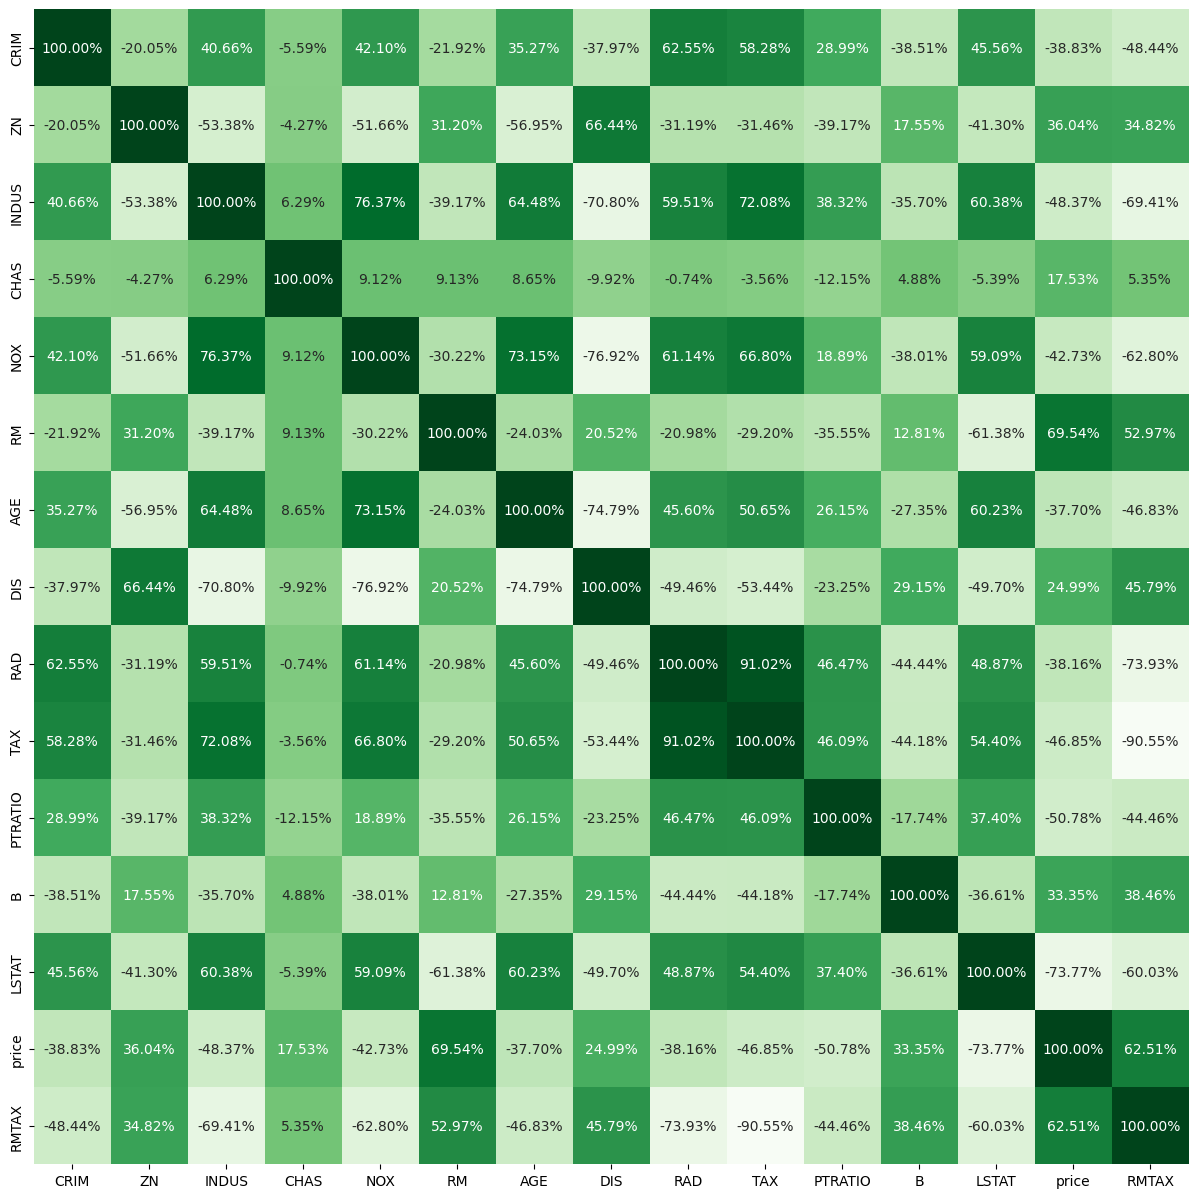

In [11]:
#plotting the heatmap of correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=False, square= True, fmt=".2%", annot=True, cmap="Greens")

## Data Splitting

In [12]:
# spliting data into features(X) & target (y)
y= data['price']
X= data.drop('price', axis = 1)

## Feature Scaling

In [13]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X) # returns list
scaled_X

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 4.78762792e-01],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 6.01397780e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.89737254e-01, 6.34657837e-02, 6.91013979e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 5.73580804e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.91300620e-01, 1.31070640e-01, 5.54656615e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 4.75216615e-01]])

In [14]:
scaled_data = pd.DataFrame(scaled_X,columns=X.columns)

In [15]:
scaled_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RMTAX
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.478763
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.601398
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.691014
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.743030
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.762082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.533757
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.484575
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.573581
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.554657


## Train Test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
X_train

(404, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RMTAX
477,0.168788,0.00,0.646628,0.0,0.471193,0.333972,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625,0.074290
15,0.006981,0.00,0.281525,0.0,0.314815,0.435524,0.552008,0.306359,0.130435,0.229008,0.893617,0.996772,0.185982,0.387655
332,0.000319,0.35,0.205279,0.0,0.108848,0.473271,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322,0.411373
423,0.079174,0.00,0.646628,0.0,0.471193,0.487066,0.846550,0.081132,1.000000,0.914122,0.808511,0.005547,0.594923,0.108345
19,0.008087,0.00,0.281525,0.0,0.314815,0.415022,0.685891,0.242514,0.130435,0.229008,0.893617,0.984997,0.263521,0.377761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.001853,0.00,0.296921,0.0,0.277778,0.435907,0.916581,0.098337,0.173913,0.375954,0.882979,0.996898,0.467163,0.279635
270,0.003291,0.20,0.238270,0.0,0.162551,0.439739,0.403708,0.300030,0.086957,0.068702,0.638298,0.979197,0.310982,0.593649
348,0.000098,0.80,0.056818,0.0,0.102881,0.589002,0.276004,0.656039,0.130435,0.177481,0.468085,0.984972,0.117550,0.520876
435,0.125369,0.00,0.646628,0.0,0.730453,0.587852,0.944387,0.090489,1.000000,0.914122,0.808511,0.276186,0.594371,0.130764


In [18]:
X_test.shape

(102, 14)

In [19]:
y_train.shape

(404,)

# Trying different regression models

## 1. Linear Regression

In [20]:
# linear regression
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
y_predicted = model.predict(X_train)
print('training loss: ', mean_squared_error(y_train,y_predicted))

training loss:  20.234028132618125


In [21]:
y_predicted = model.predict(X_test)

In [22]:
#Mosel Accuracy
regTrain_score=model.score(X_train,y_train)*100
regTest_score=model.score(X_test,y_test)*100
print("Training Accuracy : ",regTrain_score)
print("Testing Accuracy : ",regTest_score)

Training Accuracy :  76.70860442912466
Testing Accuracy :  68.52427342357643


# Model Evaluation

In [23]:
LR_mse = mean_squared_error(y_test,y_predicted)
print("Testing loss: ", LR_mse)

Testing loss:  23.0823410756906


# Model Visualization

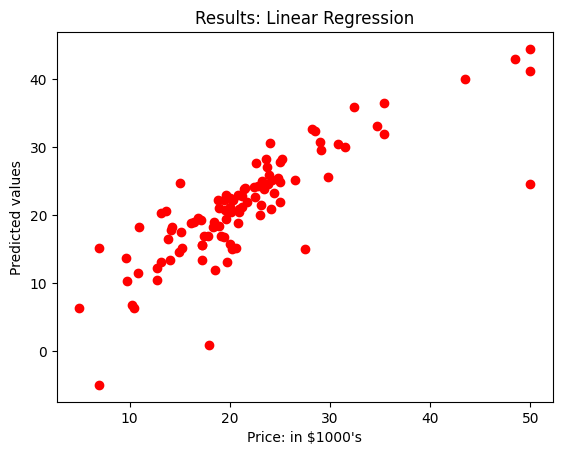

In [24]:
#plotting scatter graph to show the results between true values and predicted values
plt.scatter(y_test, y_predicted, c='red') # first argument for x_axis & second argument for y_axis and c is for color, scatter for sacttering but figure for editting figures
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted values")
plt.title("Results: Linear Regression")
plt.show()

## 2. Decision Tree

In [25]:
DS = DecisionTreeRegressor(random_state = 0)
DS.fit(X_train,y_train)
y_predicted = DS.predict(X_train)
print('training loss: ', mean_squared_error(y_train,y_predicted))

training loss:  0.0


In [26]:
y_predicted = DS.predict(X_test)

In [27]:
# Model Accuracy
DSTrain_score=DS.score(X_train,y_train)*100
DSTest_score=DS.score(X_test,y_test)*100
print("Training Accuracy : ",DSTrain_score)
print("Testing Accuracy : ",DSTest_score)

Training Accuracy :  100.0
Testing Accuracy :  85.77909792626312


## Model Evaluation

In [28]:
DT_mse = mean_squared_error(y_test,y_predicted)
print("Testing loss: ", DT_mse)

Testing loss:  10.42872549019608


## Model Visualization

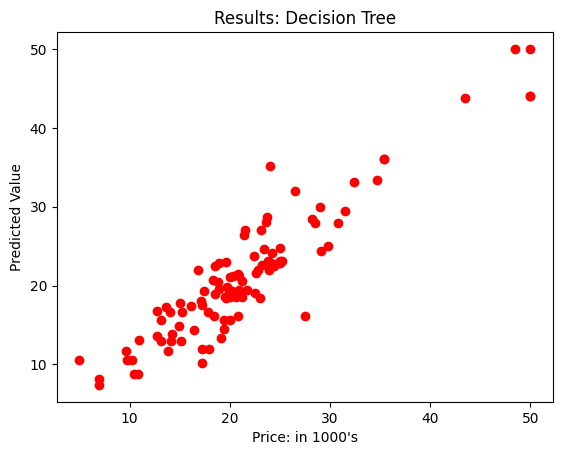

In [29]:
plt.scatter(y_test,y_predicted, c = 'red')
plt.xlabel("Price: in 1000's")
plt.ylabel("Predicted Value")
plt.title("Results: Decision Tree")
plt.show()

## 3. Random Forest

In [30]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [31]:
y_predicted = RF.predict(X_test)

In [32]:
# Model Accuracy
RFTrain_score=RF.score(X_train,y_train)*100
RFTest_score=RF.score(X_test,y_test)*100
print("Training Accuracy : ",RFTrain_score)
print("Testing Accuracy : ",RFTest_score)

Training Accuracy :  97.9153263250968
Testing Accuracy :  89.09758924174577


## Model Evaulation

In [33]:
RF_mse = mean_squared_error(y_test,y_predicted)
print("Testing loss: ", RF_mse)

Testing loss:  7.995150264705883


## Model Visualization

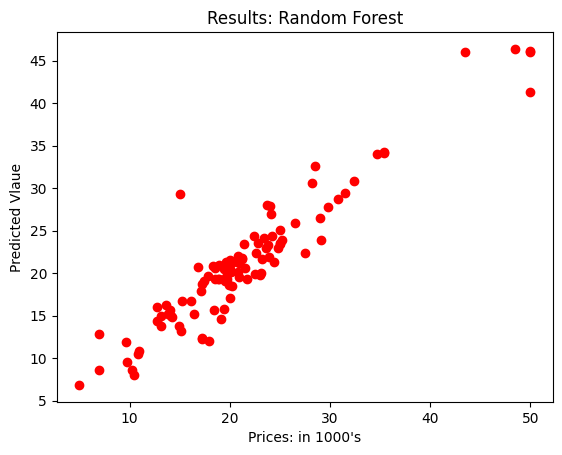

In [34]:
plt.scatter(y_test, y_predicted, c='red')
plt.xlabel("Prices: in 1000's")
plt.ylabel("Predicted Vlaue")
plt.title("Results: Random Forest")
plt.show()

### Comparing all models

In [35]:
models = pd.DataFrame({
    'Models': ['Linear regression', 'Decision Tree', 'Random Forest'],
    'MSE': [LR_mse, DT_mse, RF_mse],
    'Accuracy': [regTest_score, DSTest_score, RFTest_score]
})
models.sort_values(by='MSE', ascending=False)

,Models,MSE,Accuracy
0,Linear regression,23.082341,68.524273
1,Decision Tree,10.428725,85.779098
2,Random Forest,7.995150,89.097589
